# Customer Analysis 

### Context
An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

### Some business objectives
Retain customers, analyze relevant customer data, develop focused customer retention programs. Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

# Data cleaning and wrangling

In [90]:
# Import the necessary libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings ('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [91]:
# Load the cleaned csvs from previous labs
numerical_df = pd.read_csv (r"C:\Users\fabi_\OneDrive\Estudos e Cursos\Data analytics\Ironhack\lab-data-cleaning-and-wrangling\numerical_df.csv")
categorical_df = pd.read_csv(r"C:\Users\fabi_\OneDrive\Estudos e Cursos\Data analytics\Ironhack\lab-data-cleaning-and-wrangling\categorical_df.csv")
customer_df = pd.concat([categorical_df,numerical_df], axis=1).drop(['Unnamed: 0'],axis=1)
customer_df

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,...,policy_type,policy_number,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,...,Corporate,L3,2763.519279,56274,69,32,5,0,1,384.811147
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,...,Personal,L3,6979.535903,0,94,13,42,0,8,1131.464935
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,...,Personal,L3,12887.431650,48767,108,18,38,0,2,566.472247
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,...,Corporate,L2,7645.861827,0,106,18,65,0,7,529.881344
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,...,Personal,L1,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,...,Personal,L1,23405.987980,71941,73,18,89,0,2,198.234764
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,...,Corporate,L3,3096.511217,21604,79,14,28,0,1,379.200000
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,...,Corporate,L2,8163.890428,0,85,9,37,3,2,790.784983
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,...,Personal,L2,7524.442436,21941,96,34,3,0,3,691.200000


In [92]:
customer_df.shape

(9134, 24)

In [93]:
# Check all columns for NaN values
customer_df.isna().sum().sum()

0

In [94]:
customer_df.duplicated().sum()

0

In [95]:
# Check the data types of the columns
customer_df.dtypes

customer                          object
state                             object
response                          object
coverage                          object
education                         object
effective_to_date                 object
employment_status                 object
gender                            object
location_code                     object
marital_status                    object
renew_offer_type                  object
sales_channel                     object
vehicle_class                     object
vehicle_size                      object
policy_type                       object
policy_number                     object
customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [96]:
# The time variable can be useful. Try to transform its data into a useful one. 
# Hint: Day week and month as integers might be useful.
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])
customer_df['day'] = customer_df['effective_to_date'].dt.day
customer_df['month'] = customer_df['effective_to_date'].dt.month
customer_df['year'] = customer_df['effective_to_date'].dt.year
customer_df

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,...,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day,month,year
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,...,56274,69,32,5,0,1,384.811147,24,2,2011
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,...,0,94,13,42,0,8,1131.464935,31,1,2011
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,...,48767,108,18,38,0,2,566.472247,19,2,2011
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,...,0,106,18,65,0,7,529.881344,20,1,2011
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,...,43836,73,12,44,0,1,138.130879,3,2,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,...,71941,73,18,89,0,2,198.234764,10,2,2011
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,...,21604,79,14,28,0,1,379.200000,12,2,2011
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,...,0,85,9,37,3,2,790.784983,6,2,2011
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,...,21941,96,34,3,0,3,691.200000,3,2,2011


In [97]:
customer_df.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'location_code',
       'marital_status', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'policy_type', 'policy_number',
       'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'day', 'month', 'year'],
      dtype='object')

## Outliers

In [98]:
# separate numerical columns
customer_df.select_dtypes(include=['number']).columns.tolist()
numerical_df = customer_df[['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount',
 'day',
 'month',
 'year']]
numerical_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day,month,year
0,2763.519279,56274,69,32,5,0,1,384.811147,24,2,2011
1,6979.535903,0,94,13,42,0,8,1131.464935,31,1,2011
2,12887.431650,48767,108,18,38,0,2,566.472247,19,2,2011
3,7645.861827,0,106,18,65,0,7,529.881344,20,1,2011
4,2813.692575,43836,73,12,44,0,1,138.130879,3,2,2011
...,...,...,...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764,10,2,2011
9130,3096.511217,21604,79,14,28,0,1,379.200000,12,2,2011
9131,8163.890428,0,85,9,37,3,2,790.784983,6,2,2011
9132,7524.442436,21941,96,34,3,0,3,691.200000,3,2,2011


In [99]:
numerical_df.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
day                                31
month                               2
year                                1
dtype: int64

In [100]:
# to get discrete variables
def get_discrete_df(numerical_df, threshold=100):
    discrete_columns = [col for col in numerical_df.columns if numerical_df[col].nunique() <= threshold]
    discrete_df = numerical_df[discrete_columns]
    return discrete_df
discrete_df = get_discrete_df(numerical_df)
discrete_df

,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,day,month,year
0,32,5,0,1,24,2,2011
1,13,42,0,8,31,1,2011
2,18,38,0,2,19,2,2011
3,18,65,0,7,20,1,2011
4,12,44,0,1,3,2,2011
...,...,...,...,...,...,...,...
9129,18,89,0,2,10,2,2011
9130,14,28,0,1,12,2,2011
9131,9,37,3,2,6,2,2011
9132,34,3,0,3,3,2,2011


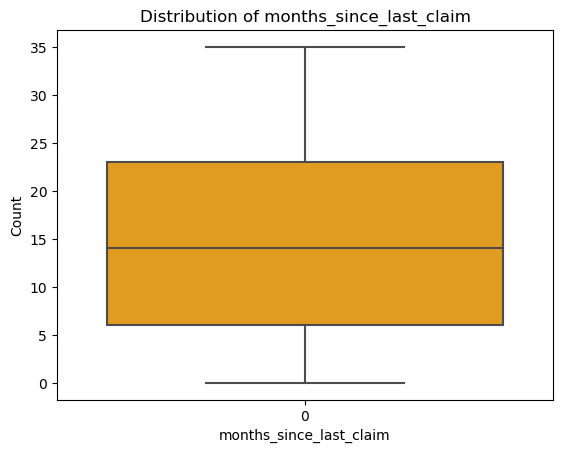

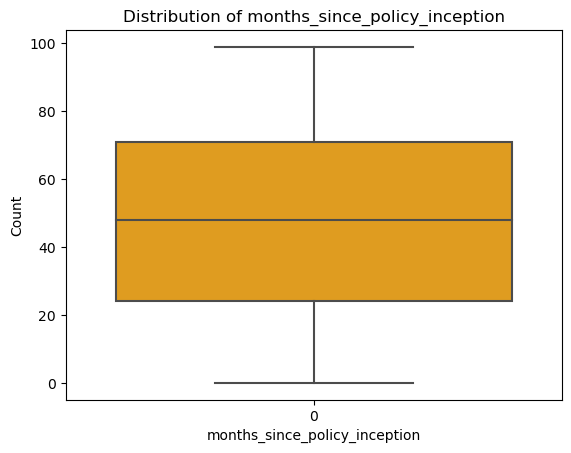

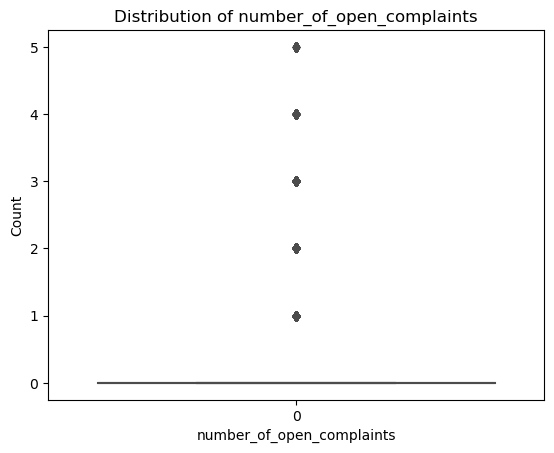

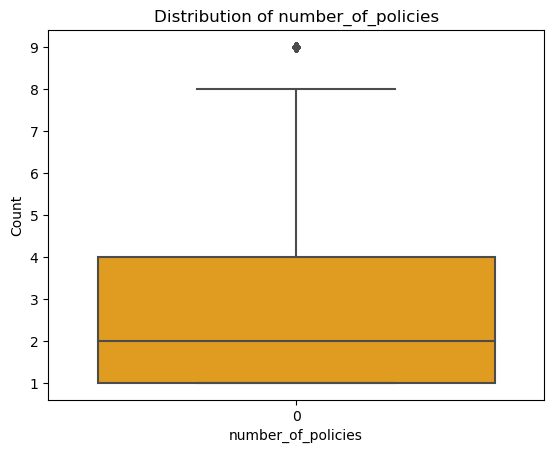

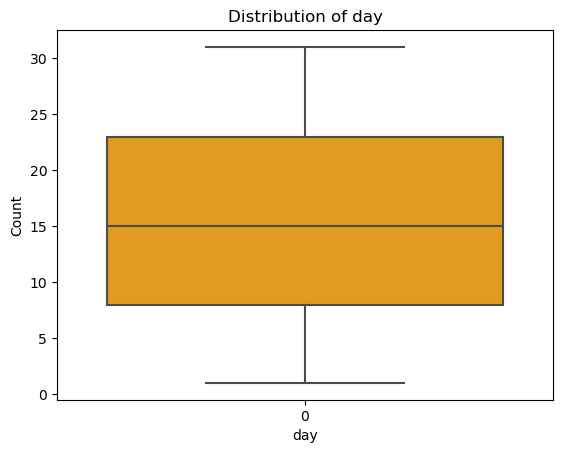

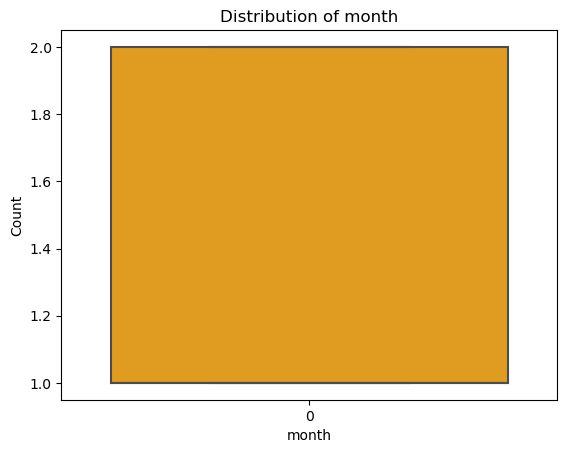

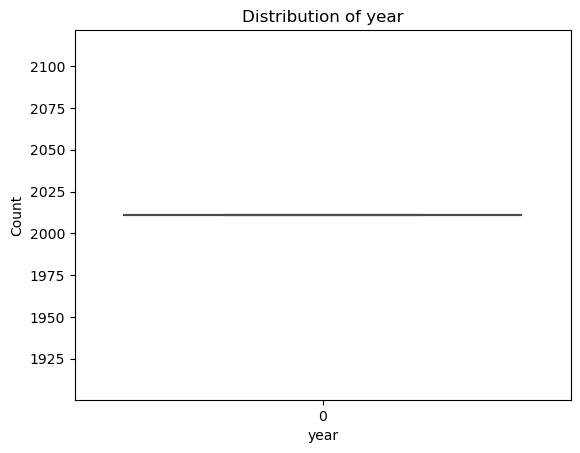

In [101]:
# visualize outliers
def plot_numerical_variables(discrete_df):
        
    for column in discrete_df:
        sns.boxplot(discrete_df[column], color='orange')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

plot_numerical_variables(discrete_df)

In [102]:
# it wouldn't make sense to remove outliers from all variables, I tested that and it simply removed all rows from the df!
# and it doesn't seem to be necessary to drop outliers from discrete variables since they have a small number of unique values

In [103]:
# variables with 'nunique' >= 100 can be considered continuous variables
def get_continuous_df(numerical_df, threshold=100):
    continuous_columns = [col for col in numerical_df.columns if numerical_df[col].nunique() > threshold]
    continuous_df = numerical_df[continuous_columns]
    return continuous_df
continuous_df = get_continuous_df(numerical_df)
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879
...,...,...,...,...
9129,23405.987980,71941,73,198.234764
9130,3096.511217,21604,79,379.200000
9131,8163.890428,0,85,790.784983
9132,7524.442436,21941,96,691.200000


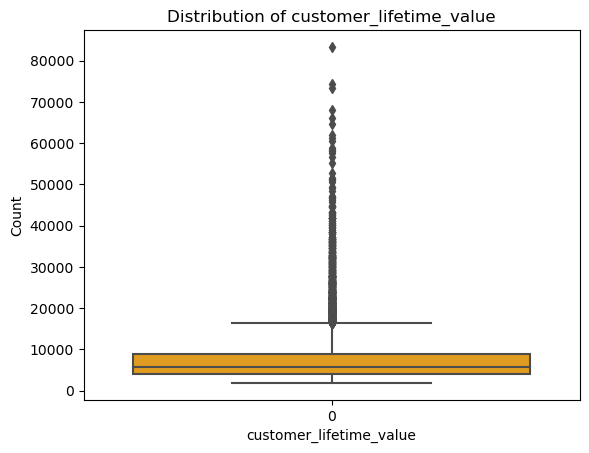

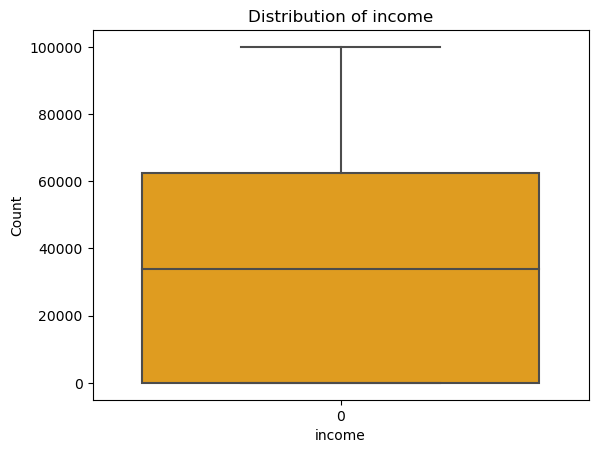

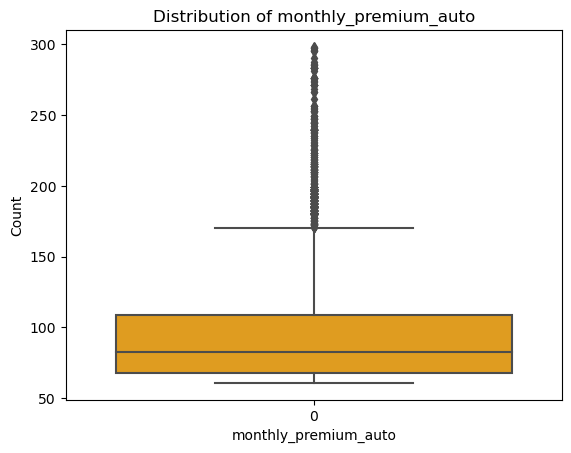

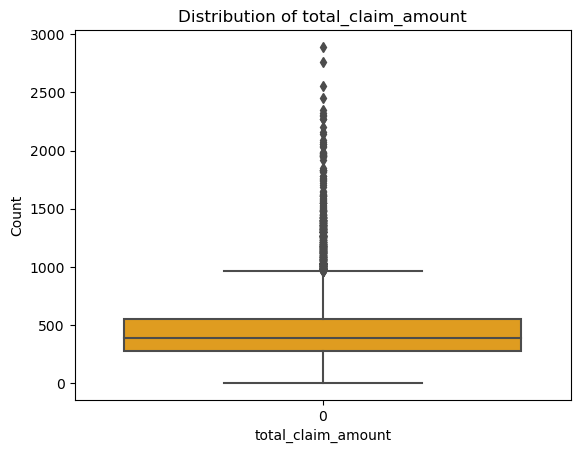

In [104]:
# visualize outliers
def plot_numerical_variables(continuous_df):
        
    for column in continuous_df:
        sns.boxplot(continuous_df[column], color='orange')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()

plot_numerical_variables(continuous_df)

In [105]:
# Based on the boxplots above continuous variables (except 'income') have a high number of dat points abve the max whisker
# those can be regarded as outliers 
# Calculate and print the lower and upper bounds to see if they make sense.

# Examine IQR and Bounds for Each Column:      
for col in continuous_df.columns:
    Q1 = continuous_df[col].quantile(0.25)
    Q3 = continuous_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"Column: {col}, Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# the lower bound is giving negative values so we don't need to take that into consideration

Column: customer_lifetime_value, Q1: 3994.25179425, Q3: 8962.16704125, IQR: 4967.915247000001, Lower Bound: -3457.6210762500014, Upper Bound: 16414.039911750002
Column: income, Q1: 0.0, Q3: 62320.0, IQR: 62320.0, Lower Bound: -93480.0, Upper Bound: 155800.0
Column: monthly_premium_auto, Q1: 68.0, Q3: 109.0, IQR: 41.0, Lower Bound: 6.5, Upper Bound: 170.5
Column: total_claim_amount, Q1: 272.2582445, Q3: 547.51483875, IQR: 275.25659425, Lower Bound: -140.62664687499995, Upper Bound: 960.3997301249999


In [106]:
# since total_claim_amount is our target variable, we can plot the other variables against it to see the outliers from this perspective

'''def plot_numerical_variables(numerical_df, target_variable='total_claim_amount'):
    for column in numerical_df:
        if column != target_variable:
            sns.boxplot(x=column, y=target_variable, data=numerical_df)
            plt.show()
            
plot_numerical_variables(numerical_df)'''

# still many outliers, graphs are very hard to read

"def plot_numerical_variables(numerical_df, target_variable='total_claim_amount'):\n    for column in numerical_df:\n        if column != target_variable:\n            sns.boxplot(x=column, y=target_variable, data=numerical_df)\n            plt.show()\n            \nplot_numerical_variables(numerical_df)"

<Axes: >

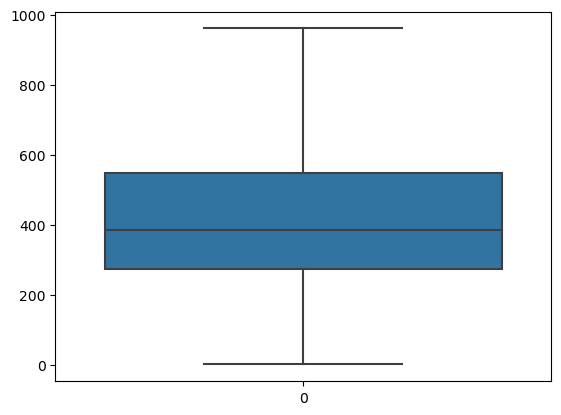

In [107]:
# there seems to be more outliers above 1000 total_claim_amount, and that's the same for the count of total_claim_amount above
sns.boxplot(customer_df['total_claim_amount'],showfliers=False)

In [108]:
customer_df.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'location_code',
       'marital_status', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'policy_type', 'policy_number',
       'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'day', 'month', 'year'],
      dtype='object')

In [109]:
customer_df['total_claim_amount'].describe()

count    9134.000000
mean      434.088794
std       290.500092
min         0.099007
25%       272.258244
50%       383.945434
75%       547.514839
max      2893.239678
Name: total_claim_amount, dtype: float64

In [110]:
# we can try to remove outliers from total_claim_amount and make our predictions based on the IQR
Q1 = customer_df['total_claim_amount'].quantile(0.25)
Q3 = customer_df['total_claim_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Column: {col}, Q1: {Q1}, Q3: {Q3}, IQR: {IQR}, Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Column: total_claim_amount, Q1: 272.2582445, Q3: 547.51483875, IQR: 275.25659425, Lower Bound: -140.62664687499995, Upper Bound: 960.3997301249999


In [111]:
# Create bins for 'total_claim_amount'
bins = [0, 272.2582445, 383.945434, 547.51483875, 960.3997301249999, 2893.239678]  # Define bin ranges
labels = ['Lower Bound','Q1', 'Q3', 'Upper Bound', 'Outliers']  # Labels for the bins

# Create a new column with the binned ranges
customer_df['claim_amount_bin'] = pd.cut(customer_df['total_claim_amount'], bins=bins, labels=labels)

# Group by the new 'claim_amount_bin' column
grouped = customer_df.groupby('claim_amount_bin')

# Get counts for each group
print("Counts in each group:")
print(grouped.size())
print()
# Calculate some statistics for each group
group_stats = grouped['total_claim_amount'].agg(['min', 'max', 'std'])
print("Statistics for each group:")
print(group_stats)

Counts in each group:
claim_amount_bin
Lower Bound    2284
Q1             2283
Q3             2283
Upper Bound    1831
Outliers        453
dtype: int64

Statistics for each group:
                         min          max         std
claim_amount_bin                                     
Lower Bound         0.099007   272.217171   77.469292
Q1                272.381465   383.890867   26.969370
Q3                384.000000   547.200000   46.660073
Upper Bound       547.619785   960.115399  113.811611
Outliers          962.159318  2893.239678  311.706116


In [112]:
# the count of values in total_claim_amount from our upper_bound until the max value is not so high, but it has a very high std
# we can create 2 prediction models, one for total_claim_amount <=960 and another for >960

In [113]:
customer_df.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'location_code',
       'marital_status', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'policy_type', 'policy_number',
       'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'day', 'month', 'year', 'claim_amount_bin'],
      dtype='object')

In [114]:
# Define the split point (upper bound found above)
split_point = 960.3997301249999

# Create subsets based on the condition
customers_no_outliers = customer_df[customer_df['total_claim_amount'] <= split_point]
customers_outliers = customer_df[customer_df['total_claim_amount'] > split_point]

In [115]:
customers_no_outliers

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,...,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day,month,year,claim_amount_bin
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,...,69,32,5,0,1,384.811147,24,2,2011,Q3
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,...,108,18,38,0,2,566.472247,19,2,2011,Upper Bound
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,...,106,18,65,0,7,529.881344,20,1,2011,Q3
4,HB64268,Washington,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Single,...,73,12,44,0,1,138.130879,3,2,2011,Lower Bound
5,OC83172,Oregon,Yes,Basic,Bachelor,2011-01-25,Employed,F,Rural,Married,...,69,14,94,0,2,159.383042,25,1,2011,Lower Bound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Married,...,73,18,89,0,2,198.234764,10,2,2011,Lower Bound
9130,PK87824,California,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Divorced,...,79,14,28,0,1,379.200000,12,2,2011,Q1
9131,TD14365,California,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Single,...,85,9,37,3,2,790.784983,6,2,2011,Upper Bound
9132,UP19263,California,No,Extended,College,2011-02-03,Employed,M,Suburban,Married,...,96,34,3,0,3,691.200000,3,2,2011,Upper Bound


In [116]:
customers_no_outliers.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'location_code',
       'marital_status', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'policy_type', 'policy_number',
       'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'day', 'month', 'year', 'claim_amount_bin'],
      dtype='object')

In [117]:
print("\nStatistics for 'total_claim_amount' <= 960:")
print(customers_no_outliers['total_claim_amount'].agg(['min', 'max', 'std']))


Statistics for 'total_claim_amount' <= 960:
min      0.099007
max    960.115399
std    211.184004
Name: total_claim_amount, dtype: float64


In [118]:
customers_no_outliers.describe()

,effective_to_date,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day,month,year
count,8681,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.000000,8681.0
mean,2011-01-29 20:30:59.509273088,7691.288196,38671.169105,89.033061,15.034904,47.966018,0.385555,2.958530,390.034963,15.492224,1.463311,2011.0
min,2011-01-01 00:00:00,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000,1.000000,2011.0
25%,2011-01-15 00:00:00,3893.305281,12430.000000,68.000000,6.000000,24.000000,0.000000,1.000000,256.438030,8.000000,1.000000,2011.0
50%,2011-01-29 00:00:00,5635.746396,35205.000000,80.000000,14.000000,48.000000,0.000000,2.000000,364.800000,16.000000,1.000000,2011.0
75%,2011-02-14 00:00:00,8696.710700,63288.000000,106.000000,23.000000,71.000000,0.000000,4.000000,523.815839,23.000000,2.000000,2011.0
max,2011-02-28 00:00:00,67907.270500,99981.000000,296.000000,35.000000,99.000000,5.000000,9.000000,960.115399,31.000000,2.000000,2011.0
std,NaN,6376.126782,30320.745669,27.095584,10.072207,27.855645,0.912948,2.383001,211.184004,8.665731,0.498681,0.0


In [119]:
customers_outliers

,customer,state,response,coverage,education,effective_to_date,employment_status,gender,location_code,marital_status,...,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day,month,year,claim_amount_bin
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,...,94,13,42,0,8,1131.464935,31,1,2011,Outliers
73,HB20453,Oregon,No,Basic,Bachelor,2011-02-04,Unemployed,M,Suburban,Single,...,104,30,3,1,5,982.399613,4,2,2011,Outliers
135,MS41162,Arizona,No,Basic,High School or Below,2011-01-26,Unemployed,M,Suburban,Single,...,117,6,1,0,1,975.107098,26,1,2011,Outliers
142,LP84436,California,No,Extended,High School or Below,2011-01-21,Unemployed,F,Suburban,Single,...,127,30,11,0,6,1087.995426,21,1,2011,Outliers
181,KC11055,Nevada,No,Extended,Bachelor,2011-01-24,Employed,F,Suburban,Married,...,217,4,29,2,4,1122.658899,24,1,2011,Outliers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,UZ14076,California,No,Premium,High School or Below,2011-02-16,Employed,F,Suburban,Married,...,266,4,18,1,2,2452.894264,16,2,2011,Outliers
9103,CZ57208,California,No,Basic,Bachelor,2011-01-01,Employed,F,Suburban,Single,...,195,24,1,0,4,1329.957905,1,1,2011,Outliers
9107,UU42868,California,Yes,Premium,High School or Below,2011-01-26,Unemployed,M,Suburban,Married,...,153,25,5,0,1,1027.000029,26,1,2011,Outliers
9109,JR41742,California,No,Basic,College,2011-01-25,Unemployed,M,Suburban,Single,...,108,23,52,0,1,1254.177129,25,1,2011,Outliers


In [120]:
print("\nStatistics for 'total_claim_amount' > 960:")
print(customers_outliers['total_claim_amount'].agg(['min', 'max', 'std']))


Statistics for 'total_claim_amount' > 960:
min     962.159318
max    2893.239678
std     311.706116
Name: total_claim_amount, dtype: float64


In [121]:
customers_outliers.describe()

,effective_to_date,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,day,month,year
count,453,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.0
mean,2011-01-29 12:14:18.278145792,14015.570577,18229.779249,173.441501,16.286976,49.953642,0.362031,3.112583,1278.308020,14.865342,1.472406,2011.0
min,2011-01-01 00:00:00,2840.899849,0.000000,80.000000,0.000000,0.000000,0.000000,1.000000,962.159318,1.000000,1.000000,2011.0
25%,2011-01-15 00:00:00,7180.283897,0.000000,122.000000,7.000000,25.000000,0.000000,1.000000,1051.200000,8.000000,1.000000,2011.0
50%,2011-01-29 00:00:00,10179.717040,0.000000,181.000000,16.000000,48.000000,0.000000,2.000000,1197.713861,14.000000,1.000000,2011.0
75%,2011-02-13 00:00:00,16793.972800,32948.000000,212.000000,25.000000,74.000000,0.000000,5.000000,1376.910777,22.000000,2.000000,2011.0
max,2011-02-28 00:00:00,83325.381190,98623.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,31.000000,2.000000,2011.0
std,NaN,11623.283795,24411.770547,55.105966,10.030340,28.820394,0.860421,2.522140,311.706116,8.408380,0.499790,0.0


In [122]:
customers_outliers.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective_to_date', 'employment_status', 'gender', 'location_code',
       'marital_status', 'renew_offer_type', 'sales_channel', 'vehicle_class',
       'vehicle_size', 'policy_type', 'policy_number',
       'customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'day', 'month', 'year', 'claim_amount_bin'],
      dtype='object')

## Encode the categorical variables

Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [123]:
# You should deal with the categorical variables as shown below.

# One hot to state
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to sales channel
# One hot vehicle class

# Ordinal to coverage
# Ordinal to employment_status
# Ordinal to location code
# Ordinal vehicle size

categorical_columns = customer_df.select_dtypes(exclude=['number']).columns.tolist()
categorical_columns

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employment_status',
 'gender',
 'location_code',
 'marital_status',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'policy_type',
 'policy_number',
 'claim_amount_bin']

In [124]:
# Check all unique values of columns
types_of_unique_values = ['state',
 'coverage',
 'employment_status',
 'location_code',
 'marital_status',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'policy_type',
 'policy_number']
for column in types_of_unique_values:
    unique_values = categorical_df[column].unique()
    print(f"Unique values for {column}:")
    print(unique_values)
    print()

Unique values for state:
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']

Unique values for coverage:
['Basic' 'Extended' 'Premium']

Unique values for employment_status:
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']

Unique values for location_code:
['Suburban' 'Rural' 'Urban']

Unique values for marital_status:
['Married' 'Single' 'Divorced']

Unique values for sales_channel:
['Agent' 'Call Center' 'Web' 'Branch']

Unique values for vehicle_class:
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']

Unique values for vehicle_size:
['Medsize' 'Small' 'Large']

Unique values for policy_type:
['Corporate' 'Personal' 'Special']

Unique values for policy_number:
['L3' 'L2' 'L1']



In [125]:
# Apply one-hot encoding to the specified categorical columns
# this doesn't assign any hierarchy to the values 
customers_no_outliers = pd.get_dummies(customers_no_outliers, columns=['state', 'marital_status', 'policy_type', 'policy_number', 'sales_channel', 'vehicle_class'])
customers_outliers = pd.get_dummies(customers_outliers, columns=['state', 'marital_status', 'policy_type', 'policy_number', 'sales_channel', 'vehicle_class'])

In [126]:
# dummy code for ordinal:
# data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.
# this assigns some hierarchy to the values

In [128]:
# Define the ordinal encoding for each variable
coverage_mapping = {'Basic': 0, 'Extended': 1, 'Premium': 2}
employment_status_mapping = {"Medical Leave" : 0, "Disabled" : 0, "Unemployed" : 0, "Retired" : 1, "Employed": 2}
location_code_mapping = {'Rural': 0, 'Suburban': 1, 'Urban': 2}
vehicle_size_mapping = {'Small': 0, 'Medsize': 1, 'Large': 2}

# Apply ordinal encoding with the custom mappings
customers_no_outliers['coverage_ordinal'] = customers_no_outliers['coverage'].map(coverage_mapping)
customers_no_outliers['employment_status_ordinal'] = customers_no_outliers['employment_status'].map(employment_status_mapping)
customers_no_outliers['location_code_ordinal'] = customers_no_outliers['location_code'].map(location_code_mapping)
customers_no_outliers['vehicle_size_ordinal'] = customers_no_outliers['vehicle_size'].map(vehicle_size_mapping)

customers_outliers['coverage_ordinal'] = customers_outliers['coverage'].map(coverage_mapping)
customers_outliers['employment_status_ordinal'] = customers_outliers['employment_status'].map(employment_status_mapping)
customers_outliers['location_code_ordinal'] = customers_outliers['location_code'].map(location_code_mapping)
customers_outliers['vehicle_size_ordinal'] = customers_outliers['vehicle_size'].map(vehicle_size_mapping)

In [129]:
customers_no_outliers

,customer,response,coverage,education,effective_to_date,employment_status,gender,location_code,renew_offer_type,vehicle_size,...,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,coverage_ordinal,employment_status_ordinal,location_code_ordinal,vehicle_size_ordinal
0,BU79786,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Offer1,Medsize,...,False,False,False,False,False,True,0,2,1,1
2,AI49188,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Offer1,Medsize,...,False,False,False,False,False,True,2,2,1,1
3,WW63253,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Offer1,Medsize,...,False,False,False,True,False,False,0,0,1,1
4,HB64268,No,Basic,Bachelor,2011-02-03,Employed,M,Rural,Offer1,Medsize,...,True,False,False,False,False,False,0,2,0,1
5,OC83172,Yes,Basic,Bachelor,2011-01-25,Employed,F,Rural,Offer2,Medsize,...,False,False,False,False,False,True,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,No,Basic,Bachelor,2011-02-10,Employed,M,Urban,Offer2,Medsize,...,True,False,False,False,False,False,0,2,2,1
9130,PK87824,Yes,Extended,College,2011-02-12,Employed,F,Suburban,Offer1,Medsize,...,True,False,False,False,False,False,1,2,1,1
9131,TD14365,No,Extended,Bachelor,2011-02-06,Unemployed,M,Suburban,Offer1,Medsize,...,True,False,False,False,False,False,1,0,1,1
9132,UP19263,No,Extended,College,2011-02-03,Employed,M,Suburban,Offer3,Large,...,True,False,False,False,False,False,1,2,1,2


In [130]:
customers_outliers

,customer,response,coverage,education,effective_to_date,employment_status,gender,location_code,renew_offer_type,vehicle_size,...,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,coverage_ordinal,employment_status_ordinal,location_code_ordinal,vehicle_size_ordinal
1,QZ44356,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Offer3,Medsize,...,True,False,False,False,False,False,1,0,1,1
73,HB20453,No,Basic,Bachelor,2011-02-04,Unemployed,M,Suburban,Offer1,Medsize,...,False,False,False,False,True,False,0,0,1,1
135,MS41162,No,Basic,High School or Below,2011-01-26,Unemployed,M,Suburban,Offer1,Medsize,...,False,False,False,True,False,False,0,0,1,1
142,LP84436,No,Extended,High School or Below,2011-01-21,Unemployed,F,Suburban,Offer3,Medsize,...,False,False,False,False,True,False,1,0,1,1
181,KC11055,No,Extended,Bachelor,2011-01-24,Employed,F,Suburban,Offer3,Medsize,...,False,True,False,False,False,False,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9049,UZ14076,No,Premium,High School or Below,2011-02-16,Employed,F,Suburban,Offer3,Large,...,False,False,True,False,False,False,2,2,1,2
9103,CZ57208,No,Basic,Bachelor,2011-01-01,Employed,F,Suburban,Offer1,Large,...,False,False,True,False,False,False,0,2,1,2
9107,UU42868,Yes,Premium,High School or Below,2011-01-26,Unemployed,M,Suburban,Offer2,Medsize,...,False,False,False,True,False,False,2,0,1,1
9109,JR41742,No,Basic,College,2011-01-25,Unemployed,M,Suburban,Offer1,Medsize,...,False,False,False,True,False,False,0,0,1,1


### Final df

Save dfs for future use.

In [131]:
customers_no_outliers.to_csv('customers_no_outliers.csv')
customers_outliers.to_csv('customers_outliers.csv')